In [ ]:
#| export
import svgutils
from svgutils.compose import *
import dabest
import matplotlib.pyplot as plt
# plt.style.use('seaborn-colorblind')
import esploco.plotTools
from esploco.plotTools import setFont
setFont('inter', 6)
# plt.style.use('seaborn-colorblind')
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
from matplotlib import font_manager
import matplotlib
font_dirs = ["/Users/sangyuxu/Library/Fonts"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
import matplotlib.pyplot as plt
from sksurv.nonparametric import kaplan_meier_estimator
from sksurv.compare import compare_survival

import pickle
import pandas as pd
import scipy
import numpy as np
import dabest
paperpath = '/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/'
imagepath = paperpath + 'Figures20250212/'
figurepath = imagepath + '/Figure6/'
picklepath = paperpath + 'DataforFigures/Behavior/Data/pickles/'
%run '/Users/sangyuxu/Documents/GitHub/Holophenotype5HT/nbs/02_helper/Gdocs API/writepdtogoogledocs.ipynb'
# SPREADSHEET_ID = '1nbr_gWwmOcVY252Tur-fOhx1UDA4IyAfWXCnzwCxGYo'


## Figure 6A, B

/var/folders/jq/z93pq6zd39s_vky_yyjtcxp00000gn/T/ipykernel_90634/1012058205.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brain['Normalized 5HT intensity'] = brain['Normalized 5HT intensity']/basemean
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 10.0% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)


0.7306148769399999


/var/folders/jq/z93pq6zd39s_vky_yyjtcxp00000gn/T/ipykernel_90634/1012058205.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vnc['Normalized 5HT intensity'] = vnc['Normalized 5HT intensity']/basemean
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 9.1% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)


22
26


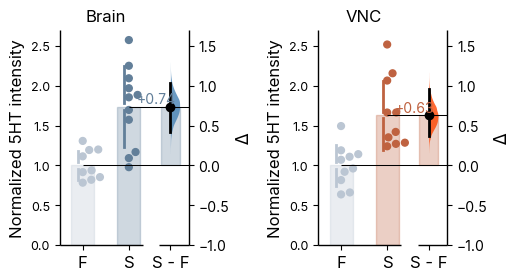

In [ ]:
setFont('inter', 9)
f, axes = plt.subplots(nrows=1, ncols=2,
                      figsize=(5, 2.8),
                      gridspec_kw={'wspace': 1, 'hspace': .5} # ensure proper width-wise spacing.
                     )
fedstarved = pd.read_csv('/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/DataforFigures/Anatomy/Figure 6CD Fed Starved w1118 5HT Stains/Fed_Starved.csv',delimiter=',')
fedstarved.columns
setFont('inter', 10)
fedstarved
brain = fedstarved.loc[fedstarved['Region']== 'Brain']
basemean = brain.loc[brain['Starvation'] == 'Fed']['Normalized 5HT intensity'].mean()
brain['Normalized 5HT intensity'] = brain['Normalized 5HT intensity']/basemean
brain_contrast = dabest.load(brain, x = 'Starvation', y = 'Normalized 5HT intensity', idx = ('Fed', 'Starved'))
fbrain = brain_contrast.mean_diff.plot(fig_size = (4,3), swarm_ylim = [0, 2.7], ax = axes[0], 
                                  custom_palette = {'Fed':'lightsteelblue', 'Starved':'steelblue'},
                                  es_marker_size = 6);


vnc = fedstarved.loc[fedstarved['Region']== 'VNC']
basemean = vnc.loc[vnc['Starvation'] == 'Fed']['Normalized 5HT intensity'].mean()
print(basemean)
vnc['Normalized 5HT intensity'] = vnc['Normalized 5HT intensity']/basemean
vnc_contrast = dabest.load(vnc, x = 'Starvation', y = 'Normalized 5HT intensity', idx = ('Fed', 'Starved'))
fvnc = vnc_contrast.mean_diff.plot(fig_size = (4,3), swarm_ylim = [0, 2.7], ax = axes[1], 
                                  custom_palette = {'Fed':'lightsteelblue', 'Starved':'orangered'},
                                  es_marker_size = 6);
# vnc_5ht_contrast = dabest.load(vnc, x = 'Starvation', y = '5HT Intensity', idx = ('Fed', 'Starved'))
titles = ['Brain','VNC']
f.axes[0].set_xticklabels(['F', 'S']) 
f.axes[0].contrast_axes.set_xticklabels(['', 'S - F']) 
f.axes[1].set_xticklabels(['F', 'S']) 
f.axes[1].contrast_axes.set_xticklabels(['', 'S - F']) 
f.axes[0].contrast_axes.set_ylabel('$\Delta$') 
f.axes[1].contrast_axes.set_ylabel('$\Delta$') 




for i in range(len(axes.flatten())):
    axes.flatten()[i].set_title(titles[i], ha = 'center')
f.savefig(figurepath+'/5htnorm.png', dpi = 300)
f.savefig(figurepath+'/5htnorm.svg')

brain_contrast_table = make_delta_results(brain_contrast, 'Fed W1118', 'Starved W1118')
# write_results_table(SPREADSHEET_ID, 'Figure 6A Brain Normalized 5HT', brain_contrast_table, sheet = 'Figure 6', starting_row = None)

vnc_contrast_table = make_delta_results(vnc_contrast, 'Fed W1118', 'Starved W1118')
# write_results_table(SPREADSHEET_ID, 'Figure 6B VNC Normalized 5HT', vnc_contrast_table, sheet = 'Figure 6', starting_row = None)


# RNAi Data

In [9]:
metapath = paperpath + 'DataforFigures/Behavior/Data/Metadata/Figure6exptMeta.csv'
fullMetaData = pd.read_csv(metapath)
dataDict=dict()
stateDict = {'24':'Starved','48':'Starved', '0':'Fed'}

for i in range(len(fullMetaData)):
    data = pd.read_csv(picklepath + fullMetaData.iloc[i, 1]).sort_values(by = 'Status')
    data['Starvation'] = data['Starvation'].round().astype('str')
    dataDict[fullMetaData.iloc[i, 0] ]= data
    fullMetaData.iloc[i, -3] = data['Starvation'][0]
    fullMetaData.iloc[i, -2] = stateDict[data['Starvation'][0]]
    fullMetaData.iloc[i, -1] = len(data.loc[data['Status']=='Test'])

print(fullMetaData)


         Expt               File Group Delta Type Starved Hours State  \
0       w1118  W1118Dark_ele.csv    wt      delta             0   Fed   
1       w1118  W1118Dark_ele.csv    wt      delta             0   Fed   
2       w1118  W1118Dark_ele.csv    wt      delta             0   Fed   
3       w1118  W1118Dark_ele.csv    wt      delta             0   Fed   
4       w1118  W1118Dark_ele.csv    wt      delta             0   Fed   
5     TrhTrhi    TrhTrhi_ele.csv  RNAi      delta             0   Fed   
6    TrhGluti   TrhGluti_ele.csv  RNAi      delta             0   Fed   
7    TrhSut2i   TrhSut2i_ele.csv  RNAi      delta             0   Fed   
8    TrhVTrhi   TrhVTrhi_ele.csv  RNAi      delta             0   Fed   
9   TrhVGluti  TrhVGluti_ele.csv  RNAi      delta             0   Fed   
10  TrhVSut2i  TrhVSut2i_ele.csv  RNAi      delta             0   Fed   

    Test Sample Size  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4       

## Figure 6E

['Ctrl_TrhTrhi_Combined Controls' 'Test_TrhTrhi_Trh-Gal4>Trhi'
 'Ctrl_TrhGluti_Combined Controls' 'Test_TrhGluti_Trh-Gal4>Glut1i'
 'Ctrl_TrhSut2i_Combined Controls' 'Test_TrhSut2i_Trh-Gal4>sut2i'
 'Ctrl_TrhVTrhi_Combined Controls' 'Test_TrhVTrhi_Trh-AND-tsh-Gal4>Trhi'
 'Ctrl_TrhVGluti_Combined Controls'
 'Test_TrhVGluti_Trh-AND-tsh-Gal4>Glut1i'
 'Ctrl_TrhVSut2i_Combined Controls'
 'Test_TrhVSut2i_Trh-AND-tsh-Gal4>sut2i']
0             Ctrl_TrhTrhi_Combined Controls
63            Ctrl_TrhTrhi_Combined Controls
62            Ctrl_TrhTrhi_Combined Controls
61            Ctrl_TrhTrhi_Combined Controls
60            Ctrl_TrhTrhi_Combined Controls
                       ...                  
37     Test_TrhVSut2i_Trh-AND-tsh-Gal4>sut2i
36     Test_TrhVSut2i_Trh-AND-tsh-Gal4>sut2i
35     Test_TrhVSut2i_Trh-AND-tsh-Gal4>sut2i
49     Test_TrhVSut2i_Trh-AND-tsh-Gal4>sut2i
135    Test_TrhVSut2i_Trh-AND-tsh-Gal4>sut2i
Name: StatusExpt, Length: 519, dtype: object
30


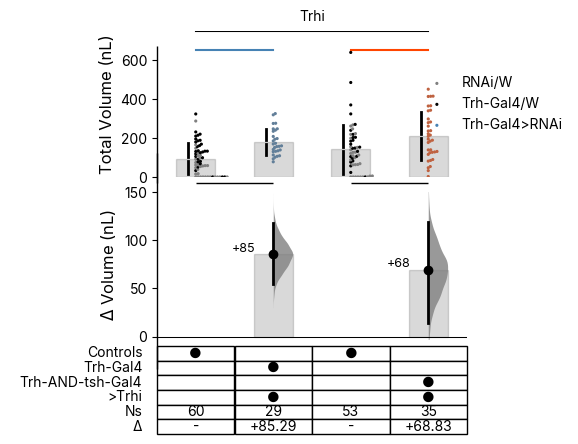

In [ ]:
# fig6b, axes = plt.subplots(2, 3, figsize = [12, 6])
%run 001_ContrastPlotkwargs.ipynb
setFont('inter', 10)
rnaidata = []
for i in fullMetaData.index:
    if fullMetaData.loc[i, 'Expt'] !='w1118':
        data = dataDict[fullMetaData.iloc[i, 0]]
        data['Expt'] = fullMetaData.loc[i, 'Expt']
        rnaidata.append(data)
rnaidf = pd.concat(rnaidata)

rnaidf = rnaidf.drop(rnaidf.loc[rnaidf['Genotype']=='empty'].index)
rnaidf['Volume'] = rnaidf['Volume'] *1000
rnaidf['GenoReduced'] =rnaidf['Genotype'].replace({'w1118; uas-trhi':'Trhi/W', 'w1118; trh-gal4':'Trh-Gal4/W', 
                                                   'trh-gal4>uas-trhi':'Trh-Gal4>Trhi',
       'w1118; uas-gluti40904':'Glut1i/W', 'trh-gal4>uas-gluti40904':'Trh-Gal4>Glut1i',
       'w1118; uas-sut2rnai':'sut2i/W', 'trh-gal4>uas-sut2rnai':'Trh-Gal4>sut2i',
       'w1118; trhvnc-gal4':'Trh-AND-tsh-Gal4/W', 'trh-vnc-gal4>uas-trhrnai':'Trh-AND-tsh-Gal4>Trhi',
       'trhvnc-gal4<uas-gluti40904':'Trh-AND-tsh-Gal4>Glut1i', 'trh-vnc-gal4>uas-sut2rnai':'Trh-AND-tsh-Gal4>sut2i'})

rnaidf['GenoReduced1'] =rnaidf['Genotype'].replace({'w1118; uas-trhi':'RNAi/W', 'w1118; trh-gal4':'Trh-Gal4/W', 
                                                   'trh-gal4>uas-trhi':'Trh-Gal4>RNAi',
       'w1118; uas-gluti40904':'RNAi/W', 'trh-gal4>uas-gluti40904':'Trh-Gal4>RNAi',
       'w1118; uas-sut2rnai':'RNAi/W', 'trh-gal4>uas-sut2rnai':'Trh-Gal4>RNAi',
       'w1118; trhvnc-gal4':'Trh-AND-tsh-Gal4/W', 'trh-vnc-gal4>uas-trhrnai':'Trh-AND-tsh-Gal4>RNAi',
       'trhvnc-gal4<uas-gluti40904':'Trh-AND-tsh-Gal4>RNAi', 'trh-vnc-gal4>uas-sut2rnai':'Trh-AND-tsh-Gal4>RNAi'})

rnaidf.loc[rnaidf['Status'] == 'Ctrl', 'GenoReduced'] = 'Combined Controls'
rnaidf['GenoReduced']
rnaidf['StatusExpt'] = rnaidf['Status'] + '_' + rnaidf['Expt'] + '_'+rnaidf['GenoReduced']
print(rnaidf['StatusExpt'].unique())
idx  = (('Ctrl_TrhTrhi_Combined Controls', 'Test_TrhTrhi_Trh-Gal4>Trhi'), ('Ctrl_TrhVTrhi_Combined Controls', 'Test_TrhVTrhi_Trh-AND-tsh-Gal4>Trhi'), 
        )
rnaipalette = {'Ctrl_TrhTrhi_Combined Controls':'gray', 'Test_TrhTrhi_Trh-Gal4>Trhi':'steelblue', 'Ctrl_TrhVTrhi_Combined Controls':'gray', 'Test_TrhVTrhi_TrhVNC-Gal4>Trhi':'orangered',
               'Ctrl_TrhGluti_Combined Controls':'gray', 'Test_TrhGluti_Trh-Gal4>Glut1i':'steelblue', 'Ctrl_TrhVGluti_Combined Controls':'gray', 'Test_TrhVGluti_TrhVNC-Gal4>Glut1i':'orangered', 
       'Ctrl_TrhSut2i_Combined Controls':'gray', 'Test_TrhSut2i_Trh-Gal4>sut2i':'steelblue', 'Ctrl_TrhVSut2i_Combined Controls':'gray', 'Test_TrhVSut2i_TrhVNC-Gal4>sut2i':'orangered'}
rnaigenopalette = {'w1118; uas-trhi':'gray', 'w1118; trh-gal4':'k', 'trh-gal4>uas-trhi':'steelblue',
       'w1118; uas-gluti40904':'gray', 'trh-gal4>uas-gluti40904':'steelblue',
       'w1118; uas-sut2rnai':'gray', 'trh-gal4>uas-sut2rnai':'steelblue',
       'w1118; trhvnc-gal4':'k', 'trh-vnc-gal4>uas-trhrnai':'orangered',
       'trhvnc-gal4<uas-gluti40904':'orangered', 'trh-vnc-gal4>uas-sut2rnai':'orangered'}
rnaigenoreducedpalette = {'RNAi/W':'gray', 'Trh-Gal4/W':'k', 'Trh-Gal4>RNAi':'steelblue',
       'RNAi/W':'gray', 'Trh-Gal4>RNAi':'steelblue',
       'RNAi/W':'gray', 'Trh-Gal4>RNAi':'steelblue',
       'Trh-AND-tsh-Gal4/W':'k', 'Trh-AND-tsh-Gal4>RNAi':'orangered',
       'Trh-AND-tsh-Gal4>RNAi':'orangered', 'Trh-AND-tsh-Gal4>RNAi':'orangered'}
print(rnaidf.StatusExpt)

rnaiC= dabest.load(rnaidf, x = 'StatusExpt', y = 'Volume', idx = idx)
frnaiC = rnaiC.mean_diff.plot(
    color_col = 'GenoReduced1', 
                              fig_size=(4, 4), 
                              custom_palette= rnaigenoreducedpalette, 
                              delta_text_kwargs =dt_kwargs, 
                              contrast_bars_kwargs= cb_kwargs,
                              swarm_bars_kwargs= sb_kwargs,
                              raw_marker_size=rm_size,  
                              es_marker_size= es_size,
                             gridkey_rows=['Controls', 'Trh-Gal4', 'Trh-AND-tsh-Gal4', '>Trhi',] 
                             )
frnaiC.axes[0].set_xticklabels(['Ctrl', 'Test', 'Ctrl', 'Test'])
frnaiC.axes[1].set_xticklabels(['', 'Test - Ctrl', '', 'Test - Ctrl'])
frnaiC.axes[0].plot([0, 1], [650, 650], color = 'steelblue')
frnaiC.axes[0].plot([2, 3], [650, 650], color = 'orangered')
frnaiC.axes[0].plot([0, 3], [750, 750], color = 'k')
# frnaiC.axes[0].text(.5, 660, 'Brain', ha =  'center', color = 'steelblue')
# frnaiC.axes[0].text(2.5, 660, 'VNC', ha =  'center', color = 'orangered')
frnaiC.axes[0].text(1.5, 800, 'Trhi', ha =  'center', color = 'k')
frnaiC.axes[0].set_ylabel('Total Volume (nL)')
frnaiC.axes[1].set_ylabel('$\Delta$ Volume (nL)')
frnaiC.axes[1].set_ylim(-2, 150)
frnaiC.axes[0].set_ylim(-2, 750)
order = [2, 1, 0]
handles = rnaidf.GenoReduced1.unique()
handles = handles[[0, 1, 2]]

frnaiC.axes[0].legend([handles[2-i] for i in order], frameon=False,loc='right', bbox_to_anchor=[1.35, 0.5], fontsize= 10, markerscale = 1, edgecolor = "white")
leg = frnaiC.axes[0].get_legend()
hl_dict = {handle.get_label(): handle for handle in leg.legendHandles}
hl_dict['_child0'].set_color(rnaigenopalette['w1118; uas-trhi'])
hl_dict['_child1'].set_color(rnaigenopalette['w1118; trh-gal4'])
hl_dict['_child2'].set_color(rnaigenopalette['trh-gal4>uas-trhi'])
# hl_dict['_child3'].set_color(rnaigenopalette['w1118; trh-gal4'])
# hl_dict['_child4'].set_color(rnaigenopalette['trh-gal4>uas-trhi'])
rnaidf.to_csv(figurepath+'/rnaidf.csv')
for i in range(13, 15):
    frnaiC.axes[1].get_children()[i].set_text(frnaiC.axes[1].get_children()[i].get_text()[0:-3])
for i in range(7, 9):
    frnaiC.axes[1].get_children()[i].set_visible(False)
frnaiC.tight_layout(w_pad=12)
frnaiC.savefig(figurepath+'/Trhi.svg', bbox_inches='tight')
frnaiC.savefig(figurepath+'/Trhi.png', dpi = 300, bbox_inches='tight')

effectTable = rnaiC.mean_diff.results[['control','test','control_N','test_N','effect_size','difference','bca_low','bca_high', 'pvalue_mann_whitney']]

# write_results_table(SPREADSHEET_ID, 'Figure 6E Trhi', effectTable, sheet = 'Figure 6', starting_row = None)


# Figure 6 F

0             Ctrl_TrhTrhi_Combined Controls
63            Ctrl_TrhTrhi_Combined Controls
62            Ctrl_TrhTrhi_Combined Controls
61            Ctrl_TrhTrhi_Combined Controls
60            Ctrl_TrhTrhi_Combined Controls
                       ...                  
37     Test_TrhVSut2i_Trh-AND-tsh-Gal4>sut2i
36     Test_TrhVSut2i_Trh-AND-tsh-Gal4>sut2i
35     Test_TrhVSut2i_Trh-AND-tsh-Gal4>sut2i
49     Test_TrhVSut2i_Trh-AND-tsh-Gal4>sut2i
135    Test_TrhVSut2i_Trh-AND-tsh-Gal4>sut2i
Name: StatusExpt, Length: 519, dtype: object


/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 26.8% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)


35


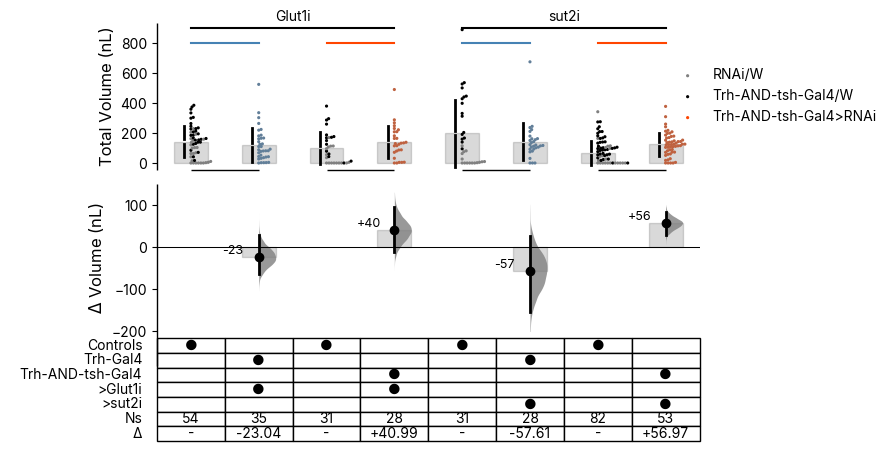

In [ ]:
# fig6b, axes = plt.subplots(2, 3, figsize = [12, 6])
%run 001_ContrastPlotkwargs.ipynb
setFont('inter', 10)
# rnaidata = []
# for i in fullMetaData.index:
#     if fullMetaData.loc[i, 'Expt'] !='w1118':
#         data = dataDict[fullMetaData.iloc[i, 0]]
#         data['Expt'] = fullMetaData.loc[i, 'Expt']
#         rnaidata.append(data)
# rnaidf = pd.concat(rnaidata)

# rnaidf = rnaidf.drop(rnaidf.loc[rnaidf['Genotype']=='empty'].index)
# rnaidf['Volume'] = rnaidf['Volume'] *1000
# rnaidf['GenoReduced'] =rnaidf['Genotype'].replace({'w1118; uas-trhi':'UAS/W', 'w1118; trh-gal4':'Trh-Gal4/W', 
#                                                    'trh-gal4>uas-trhi':'Trh-Gal4>Trhi',
#        'w1118; uas-gluti40904':'UAS/W', 'trh-gal4>uas-gluti40904':'Trh-Gal4>GLuti',
#        'w1118; uas-sut2rnai':'UAS/W', 'trh-gal4>uas-sut2rnai':'Trh-Gal4>Sut2i',
#        'w1118; trhvnc-gal4':'TrhVNC-Gal4/W', 'trh-vnc-gal4>uas-trhrnai':'TrhVNC-Gal4>Trhi',
#        'trhvnc-gal4<uas-gluti40904':'TrhVNC-Gal4>Gluti', 'trh-vnc-gal4>uas-sut2rnai':'TrhVNC-Gal4>Sut2i'})
# rnaidf.loc[rnaidf['Status'] == 'Ctrl', 'GenoReduced'] = 'Combined Controls'
# rnaidf['GenoReduced']
# rnaidf['StatusExpt'] = rnaidf['Status'] + '_' + rnaidf['Expt'] + '_'+rnaidf['GenoReduced']
# print(rnaidf['StatusExpt'].unique())
idx  = ( 
        ('Ctrl_TrhGluti_Combined Controls', 'Test_TrhGluti_Trh-Gal4>Glut1i'),('Ctrl_TrhVGluti_Combined Controls', 'Test_TrhVGluti_Trh-AND-tsh-Gal4>Glut1i'),
       ('Ctrl_TrhSut2i_Combined Controls', 'Test_TrhSut2i_Trh-Gal4>sut2i'),  ('Ctrl_TrhVSut2i_Combined Controls','Test_TrhVSut2i_Trh-AND-tsh-Gal4>sut2i'))
rnaipalette = {'Ctrl_TrhTrhi_Combined Controls':'gray', 'Test_TrhTrhi_Trh-Gal4>Trhi':'steelblue', 'Ctrl_TrhVTrhi_Combined Controls':'gray', 'Test_TrhVTrhi_TrhVNC-Gal4>Trhi':'orangered',
               'Ctrl_TrhGluti_Combined Controls':'gray', 'Test_TrhGluti_Trh-Gal4>GLuti':'steelblue', 'Ctrl_TrhVGluti_Combined Controls':'gray', 'Test_TrhVGluti_TrhVNC-Gal4>Gluti':'orangered', 
       'Ctrl_TrhSut2i_Combined Controls':'gray', 'Test_TrhSut2i_Trh-Gal4>sut2i':'steelblue', 'Ctrl_TrhVSut2i_Combined Controls':'gray', 'Test_TrhVSut2i_TrhVNC-Gal4>sut2i':'orangered'}
rnaigenopalette = {'w1118; uas-trhi':'gray', 'w1118; trh-gal4':'k', 'trh-gal4>uas-trhi':'steelblue',
       'w1118; uas-gluti40904':'gray', 'trh-gal4>uas-gluti40904':'steelblue',
       'w1118; uas-sut2rnai':'gray', 'trh-gal4>uas-sut2rnai':'steelblue',
       'w1118; trhvnc-gal4':'k', 'trh-vnc-gal4>uas-trhrnai':'orangered',
       'trhvnc-gal4<uas-gluti40904':'orangered', 'trh-vnc-gal4>uas-sut2rnai':'orangered'}
rnaigenoreducedpalette = {'RNAi/W':'gray', 'Trh-Gal4/W':'k', 'Trh-Gal4>RNAi':'steelblue',
       'RNAi/W':'gray', 'Trh-Gal4>RNAi':'steelblue',
       'RNAi/W':'gray', 'Trh-Gal4>RNAi':'steelblue',
       'Trh-AND-tsh-Gal4/W':'k', 'Trh-AND-tsh-Gal4>RNAi':'orangered',
       'Trh-AND-tsh-Gal4>RNAi':'orangered', 'Trh-AND-tsh-Gal4>RNAi':'orangered'}
print(rnaidf.StatusExpt)

rnaiC= dabest.load(rnaidf, x = 'StatusExpt', y = 'Volume', idx = idx)
frnaiC = rnaiC.mean_diff.plot(color_col = 'GenoReduced1', 
                              fig_size=(7, 4), 
                              custom_palette= rnaigenoreducedpalette, 
                              delta_text_kwargs =dt_kwargs, 
                              contrast_bars_kwargs= cb_kwargs,
                              swarm_bars_kwargs= sb_kwargs,
                              raw_marker_size=rm_size,  
                              es_marker_size= es_size,
                             gridkey_rows=['Controls', 'Trh-Gal4', 'Trh-AND-tsh-Gal4',  '>Glut1i', '>sut2i',] )
frnaiC.axes[0].set_xticklabels([ 'Ctrl', 'Test', 'Ctrl', 'Test', 'Ctrl', 'Test', 'Ctrl', 'Test'])
frnaiC.axes[1].set_xticklabels([ '', 'Test - Ctrl','', 'Test - Ctrl', '', 'Test - Ctrl','', 'Test - Ctrl',])
frnaiC.axes[0].plot([0, 1], [800, 800], color = 'steelblue')
frnaiC.axes[0].plot([2, 3], [800, 800], color = 'orangered')
frnaiC.axes[0].plot([4, 5], [800, 800], color = 'steelblue')
frnaiC.axes[0].plot([6, 7], [800, 800], color = 'orangered')
frnaiC.axes[0].plot([0, 3], [900, 900], color = 'k')
frnaiC.axes[0].plot([4, 7], [900, 900], color = 'k')
# frnaiC.axes[0].text(.5, 700, 'Brain', ha =  'center', color = 'steelblue')
# frnaiC.axes[0].text(2.5, 700, 'VNC', ha =  'center', color = 'orangered')
# frnaiC.axes[0].text(4.5, 700, 'Trh', ha =  'center', color = 'steelblue')
# frnaiC.axes[0].text(6.5, 700, 'VNC', ha =  'center', color = 'orangered')
frnaiC.axes[0].text(1.5, 950, 'Glut1i', ha =  'center', color = 'k')
frnaiC.axes[0].text(5.5, 950, 'sut2i', ha =  'center', color = 'k')
frnaiC.axes[0].set_ylabel('Total Volume (nL)')
frnaiC.axes[1].set_ylabel('$\Delta$ Volume (nL)')
frnaiC.axes[1].set_ylim(-200, 150)
order = [2, 1, 0]
handles = rnaidf.GenoReduced1.unique()
handles = handles[[0, 3, 4]]

frnaiC.axes[0].legend([handles[2-i] for i in order], frameon=False,loc='right', bbox_to_anchor=[1.35, 0.5], fontsize= 10, markerscale = 1, edgecolor = "white")
leg = frnaiC.axes[0].get_legend()
hl_dict = {handle.get_label(): handle for handle in leg.legendHandles}
hl_dict['_child0'].set_color(rnaigenopalette['w1118; uas-trhi'])
hl_dict['_child1'].set_color(rnaigenopalette['w1118; trh-gal4'])
hl_dict['_child2'].set_color(rnaigenopalette['trh-vnc-gal4>uas-trhrnai'])
# hl_dict['_child3'].set_color(rnaigenopalette['w1118; trh-gal4'])
# hl_dict['_child4'].set_color(rnaigenopalette['trh-gal4>uas-trhi'])
rnaidf.to_csv(figurepath+'/rnaidf.csv')
for i in range(23, 27):
    frnaiC.axes[1].get_children()[i].set_text(frnaiC.axes[1].get_children()[i].get_text()[0:-3])
for i in range(13, 17):
    frnaiC.axes[1].get_children()[i].set_visible(False)
frnaiC.tight_layout(w_pad=12)
frnaiC.savefig(figurepath+'/GlutSutRNAi.svg', bbox_inches='tight')
frnaiC.savefig(figurepath+'/GlutSutRNAi.png', dpi = 300, bbox_inches='tight')


effectTable = rnaiC.mean_diff.results[['control','test','control_N','test_N','effect_size','difference','bca_low','bca_high', 'pvalue_mann_whitney']]

# write_results_table(SPREADSHEET_ID, 'Figure 6F Gluti Sut2i', effectTable, sheet = 'Figure 6', starting_row = None)


In [16]:

%matplotlib inline

paperpath = '/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/'
picklepath = paperpath + 'DataforFigures/Behavior/Data/pickles/'
imagepath = paperpath + 'Figures20250212/'
figurepath = imagepath + '/Figure6/'
metapath = paperpath + 'DataforFigures/Behavior/Data/Metadata/Figure6exptMeta.csv'
fullMetaData = pd.read_csv(metapath)
dataDict=dict()
stateDict = {'24':'Starved','48':'Starved', '0':'Fed'}
for i in range(len(fullMetaData)):
    data = pd.read_csv(picklepath + fullMetaData.iloc[i, 1]).sort_values(by = ['Status', 'Light'])
    data['Starvation'] = data['Starvation'].round().astype('str')
    dataDict[fullMetaData.iloc[i, 0] ]= data
    if i ==0:
        fullMetaData.iloc[i, -1] = len(data.loc[data['Status']=='Ctrl'])
        fullMetaData.iloc[i, -3] = 'var'
        fullMetaData.iloc[i, -2] = 'var'

    else:
        fullMetaData.iloc[i, -3] = data['Starvation'][0]
        fullMetaData.iloc[i, -2] = stateDict[data['Starvation'][0]]
        fullMetaData.iloc[i, -1] = len(data.loc[data['Status']=='Test'])
starvationhrs = dataDict['w1118'].Starvation.unique()
vectorselection = ['Volume', 'Feed Speed', 'Meal Size', 'Meal Duration', 'Duration', 'Count', 'Height', 
    'Food Port Occupancy', 'Ctrl Port Occupancy','Latency', 'Speed', 'Prefeed Speed', 'Duringfeed Speed',  'Postfeed Speed', 'Duringfeed Speed Ratio',
                   'Perifeed Speed Ratio',  
                   'Falls',
                  ]

# construct new w1118_ele
w1118base = dataDict['w1118'].loc[dataDict['w1118']['Starvation'] == '0']
w1118base1 = dataDict['w1118'].loc[dataDict['w1118']['Starvation'] == '0']
w1118base1['Starvation'] = '00'
w1118base = pd.concat([w1118base, w1118base1])

w1118base.loc[w1118base['Starvation'] == '0', 'Status'] = 'Test'
w1118base.to_csv(picklepath + 'w1118_base.csv')

w1118_24st = dataDict['w1118'].loc[dataDict['w1118']['Starvation']!='48']
w1118_24st.loc[w1118_24st['Starvation'] == '24', 'Status'] = 'Test'
w1118_24st.to_csv(picklepath + 'w1118_24st.csv')

w1118_24rv = dataDict['w1118'].loc[dataDict['w1118']['Starvation']!='48']
w1118_24rv.loc[w1118_24rv['Starvation'] == '0', 'Status'] = 'Test'
w1118_24rv.to_csv(picklepath + 'w1118_24rv.csv')

w1118_48st = dataDict['w1118'].loc[dataDict['w1118']['Starvation']!='24']
w1118_48st.loc[w1118_48st['Starvation'] == '48', 'Status'] = 'Test'
w1118_48st.to_csv(picklepath + 'w1118_48st.csv')

w1118_48rv = dataDict['w1118'].loc[dataDict['w1118']['Starvation']!='24']
w1118_48rv.loc[w1118_48rv['Starvation'] == '0', 'Status'] = 'Test'
w1118_48rv.to_csv(picklepath + 'w1118_48rv.csv')

w1118Table= [ ['baseline','w1118_base.csv','wildtype','delta','00','0',0],
            ['24 h starved','w1118_24st.csv',  'wildtype','delta','24','Fed',0],
            ['24 h reversed','w1118_24rv.csv','wildtype', 'delta','0','Starved',0],
            ['48 h starved','w1118_48st.csv', 'wildtype','delta','48','Fed',0],
            ['48 h reversed','w1118_48rv.csv','wildtype', 'delta','0', 'Starved', 0],
]
# pd.DataFrame(data = w1118Table, columns = fullMetaData.columns)
fullMetaData = pd.concat([fullMetaData.drop(fullMetaData.loc[fullMetaData.Expt == 'w1118'].index), pd.DataFrame(data = w1118Table, columns = fullMetaData.columns)]).reset_index(drop = True)
for i in fullMetaData.loc[fullMetaData['Group']=='wildtype'].index:
    data = pd.read_csv(picklepath + fullMetaData.iloc[i, 1]).sort_values(by = ['Status', 'Light'])
    dataDict[fullMetaData.iloc[i, 0] ]= data
fullMetaData1 = fullMetaData.drop(6)
fullMetaData1


/var/folders/jq/z93pq6zd39s_vky_yyjtcxp00000gn/T/ipykernel_90634/858519975.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w1118base1['Starvation'] = '00'


,Expt,File,Group,Delta Type,Starved Hours,State,Test Sample Size
0,TrhTrhi,TrhTrhi_ele.csv,RNAi,delta,0,Fed,30.0
1,TrhGluti,TrhGluti_ele.csv,RNAi,delta,0,Fed,36.0
2,TrhSut2i,TrhSut2i_ele.csv,RNAi,delta,0,Fed,28.0
3,TrhVTrhi,TrhVTrhi_ele.csv,RNAi,delta,0,Fed,36.0
4,TrhVGluti,TrhVGluti_ele.csv,RNAi,delta,0,Fed,28.0
5,TrhVSut2i,TrhVSut2i_ele.csv,RNAi,delta,0,Fed,53.0
7,24 h starved,w1118_24st.csv,wildtype,delta,24,Fed,0.0
8,24 h reversed,w1118_24rv.csv,wildtype,delta,0,Starved,0.0
9,48 h starved,w1118_48st.csv,wildtype,delta,48,Fed,0.0
10,48 h reversed,w1118_48rv.csv,wildtype,delta,0,Starved,0.0


In [17]:
def collectContrasts(metadata, dimension, namelist, vectorselection):
    
    expts = metadata.loc[metadata[dimension].isin(namelist)].reset_index(drop=True)
    contrasts = []
    for i in range(len(expts)):
        contrast_vector = [None]*len(vectorselection)
        print(expts.iloc[i].Expt)
        # print(metadata.loc[metadata.Expt == expts.iloc[i].Expt]['Delta Type'])
        if metadata.loc[metadata.Expt == expts.iloc[i].Expt]['Delta Type'].values[0] == 'deltadelta':
            for j in range(len(vectorselection)):
                contrast_vector[j] = dabest.load(dataDict[expts.iloc[i].Expt], x = ['Light', 'Genotype'], 
                                                     experiment = 'Status', delta2 = True, 
                                                     y = vectorselection[j], 
            #                                          x1_level=['Ctrl', 'Test'], 
                                                     experiment_label=['Ctrl', 'Test'])
            # contrast_vector[0].mean_diff.plot()
        else:
            for j in range(len(vectorselection)):
                contrast_vector[j] = dabest.load(dataDict[expts.iloc[i].Expt], x = 'Status',
                                                     y = vectorselection[j], 
                                                     idx=('Ctrl', 'Test'),)   
            # contrast_vector[0].mean_diff.plot()

        contrasts.append(contrast_vector)
    return contrasts, expts.Expt.tolist(), expts['Delta Type'].tolist(), vectorselection
contrasts, expt, deltaType, vectorselection = collectContrasts(fullMetaData1, 'Group', ['wildtype', 'RNAi'], vectorselection)
# 

TrhTrhi
TrhGluti
TrhSut2i
TrhVTrhi
TrhVGluti
TrhVSut2i
24 h starved
24 h reversed
48 h starved
48 h reversed


In [18]:
def getBootstrapsAndG(contrasts, expt, deltaType, vectorselection):
    bootstrapsDf = pd.DataFrame(index = expt, columns = vectorselection)
    gDf = pd.DataFrame(index = expt, columns = vectorselection, dtype=float)
    for i in range(len(contrasts)):
        print(expt[i])
        for j in range(len(contrasts[0])):
            if deltaType[i] == 'delta':
                bootstrap = [contrasts[i][j].hedges_g.results.bootstraps[0]]
                g = contrasts[i][j].hedges_g.results.difference[0]
            elif deltaType[i] == 'deltadelta':
                bootstrap = [contrasts[i][j].delta_g.delta_delta.bootstraps_delta_delta]
                g = contrasts[i][j].delta_g.delta_delta.difference
            bootstrapsDf.loc[expt[i], vectorselection[j]] = bootstrap
            gDf.loc[expt[i], vectorselection[j]] = g
#         bootstrapsDf['Expt'] = expt[i]
#         gDf['Expt'] = expt[i]
    return bootstrapsDf, gDf
bootstrapsDf, gDf = getBootstrapsAndG(contrasts, expt, deltaType, vectorselection)

gDf  = gDf.rename(index = {
                            'TrhTrhi':'Trhn>Trhi', 
                           'TrhGluti':'Trhn>Gluti',
                            'TrhSut2i':'Trhn>Sut2i', 
                           'TrhVGluti':'Trhn-AND-tsh>Gluti',
                            'TrhVTrhi':'Trhn-AND-tsh>Trhi', 
                           'TrhVSut2i':'Trhn-AND-tsh>Sut2i',
                          })


TrhTrhi
TrhGluti
TrhSut2i


/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/_effsize_objects.py:299: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(


TrhVTrhi


/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/_effsize_objects.py:299: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(


TrhVGluti
TrhVSut2i
24 h starved


/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/_effsize_objects.py:299: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(


24 h reversed


/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/_effsize_objects.py:294: UserWarning: The lower limit of the interval was in the bottom 10 values. The result should be considered unstable.
  warnings.warn(


48 h starved
48 h reversed


## Figure 6 G, H

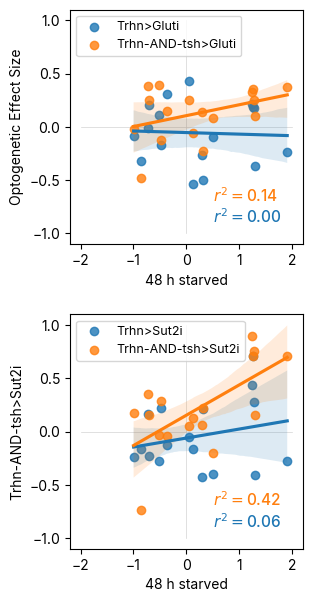

In [19]:
f, axes = plt.subplots(2,1)
f.set_size_inches(3, 7)
f.subplots_adjust(hspace = .3)
setFont('inter', 11)
# axes[0].plot([-2, 2], [0, 0], 'lightgray', linewidth = .5, zorder = 0)
# axes[0].plot([0, 0], [-1, 1], 'lightgray', linewidth = .5, zorder = 0)
# sns.regplot( x = gDf.loc['48 h starved'], y = gDf.loc['Trhn-AND-tsh>Trhi'], label = 'Trhn-AND-tsh>Trhi', ax = axes[0])
# sns.regplot( x = gDf.loc['48 h starved'], y = gDf.loc['Trhn>Trhi'],  label = 'Trhn>Trhi', ax = axes[0])


# axes[0].legend()
# axes[0].set_ylabel('Optogenetic Effect Size')
axes[0].plot([-2, 2], [0, 0], 'lightgray', linewidth = .5, zorder = 0)
axes[0].plot([0, 0], [-1, 1], 'lightgray', linewidth = .5, zorder = 0)
sns.regplot( x = gDf.loc['48 h starved'], y = gDf.loc['Trhn>Gluti'], label = 'Trhn>Gluti', ax = axes[0])
sns.regplot( x = gDf.loc['48 h starved'], y = gDf.loc['Trhn-AND-tsh>Gluti'], label = 'Trhn-AND-tsh>Gluti', ax = axes[0])
Slope, Intercept, r, p, std_err = scipy.stats.linregress(gDf.loc['48 h starved'], gDf.loc['Trhn-AND-tsh>Gluti'])
axes[0].text(0.5, -0.7, '$r^{2} = $'+ "{:.2f}".format(r**2), color = '#ff7f0e', weight = 'medium')
Slope, Intercept, r, p, std_err = scipy.stats.linregress(gDf.loc['48 h starved'], gDf.loc['Trhn>Gluti'])
axes[0].text(0.5, -0.9, '$r^{2} = $'+ "{:.2f}".format(r**2), color = '#1f77b4', weight = 'medium')
axes[0].legend(loc = 'upper left', fontsize = 9)
axes[0].set_ylabel('Optogenetic Effect Size')

axes[1].plot([-2, 2], [0, 0], 'lightgray', linewidth = .5, zorder = 0)
axes[1].plot([0, 0], [-1, 1], 'lightgray', linewidth = .5, zorder = 0)
sns.regplot( x = gDf.loc['48 h starved'], y = gDf.loc['Trhn>Sut2i'], label = 'Trhn>Sut2i', ax = axes[1])
sns.regplot( x = gDf.loc['48 h starved'], y = gDf.loc['Trhn-AND-tsh>Sut2i'], label = 'Trhn-AND-tsh>Sut2i', ax = axes[1])
Slope, Intercept, r, p, std_err = scipy.stats.linregress(gDf.loc['48 h starved'], gDf.loc['Trhn-AND-tsh>Sut2i'])
axes[1].text(0.5, -0.7, '$r^{2} = $'+ "{:.2f}".format(r**2), color = '#ff7f0e', weight = 'medium')
Slope, Intercept, r, p, std_err = scipy.stats.linregress(gDf.loc['48 h starved'], gDf.loc['Trhn>Sut2i'])
axes[1].text(0.5, -0.9, '$r^{2} = $'+ "{:.2f}".format(r**2), color = '#1f77b4', weight = 'medium')
axes[1].legend(loc = 'upper left', fontsize = 9)
# axes[2].set_ylabel('Optogenetic Effect Size')
f.savefig(figurepath+"/scatter2.svg", bbox_inches = 'tight')
f.savefig(figurepath+"/scatter2.png", dpi = 300, bbox_inches = 'tight')


##### 